In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
complaints = pd.read_csv('complaints_dec_2014.csv')

In [3]:
complaints.head(10)

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
3,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
4,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN
5,1177162,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Credit Systems International, Inc.",Closed with explanation,Yes,NaN
6,1177154,Credit card,NaN,Billing disputes,NaN,GA,31322,Web,12/31/2014,01/07/2015,Amex,Closed with explanation,Yes,NaN
7,1177143,Debt collection,Payday loan,Taking/threatening an illegal action,Threatened arrest/jail if do not pay,AZ,85023,Web,12/31/2014,01/07/2015,Speedy Cash Holdings,Closed,Yes,NaN
8,1177140,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77045,Web,12/31/2014,12/31/2014,"Afni, Inc.",Closed with explanation,Yes,NaN
9,1177139,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77045,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN


## Consumer complaints by product

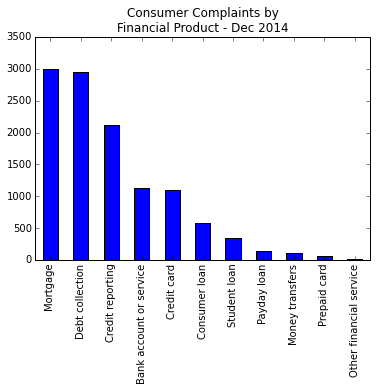

In [4]:
product_count = complaints.Product.value_counts()
product_count.plot(title = 'Consumer Complaints by\nFinancial Product - Dec 2014', kind = 'bar')


## Consumer complaints by product
We can see that consumer complaints about mortgage related issues and debt collection issues are the most frequently occuring (almost 6000 complaints) in the month of December, 2014.  The top ten most problematic products received over 11,500 complaints in one month. 

## Consumer complaints by company

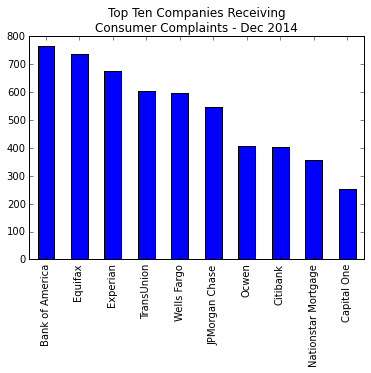

In [5]:
company_series = complaints.Company.value_counts()
company_series.head(10).plot(title='Top Ten Companies Receiving\nConsumer Complaints - Dec 2014', kind = 'bar')

## Consumer complaints by company
According to the December, 2014 bar chart above, there appears to be a high rate of consumer dissatisfaction within the financial services industry, particularly lenders and credit bureaus.  Each of the top 10 most complained about had between 250 and 775 complaints in just one month.

## Consumer complaints by company response

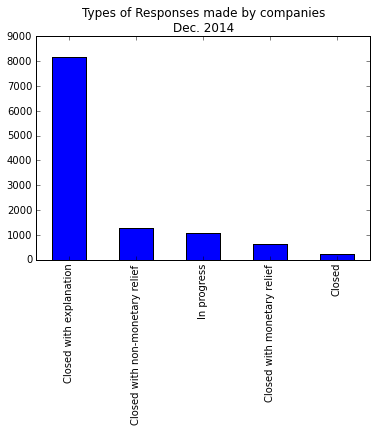

In [6]:
company_resp = complaints['Company response'].value_counts()
company_resp.head().plot(title='Types of Responses made by companies\nDec. 2014', kind = 'bar')

## Complaints measured by company response
The vast majority (approximately 8000) of customer complaints received in December of 2014 were resolved by closing the complaint file with an explanation.  A much smaller number, approximately 1000 complaints, were resolved with non-monetary relief.  Many complaints were about attempted collections of money not actually owed, so this is probably what happened in many of these cases. Note that some cases are still in prograss as of the date of data collection.

## Mean number of complaints by day of the week

TypeError: 'int' object is not callable

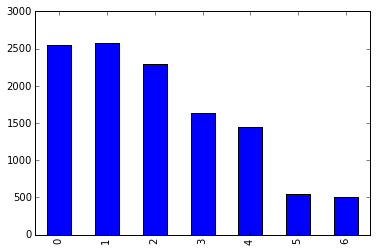

In [16]:
date_complaints = complaints.copy()
date_complaints = date_complaints.pop('Date received')

date_complaints.index = pd.to_datetime(date_complaints, format='%m/%d/%Y')

date_complaints['day_of_week'] = date_complaints.index.dayofweek
date_complaints.replace({'day_of_week':
                         {0: 'Monday',
                          1: 'Tuesday',
                          2: 'Wednesday',
                          3: 'Thursday',
                          4: 'Friday',
                          5: 'Saturday',
                          6: 'Sunday'}}) \
                .day_of_week.value_counts(sort=False)

date_complaints.day_of_week.value_counts(sort=False).plot(kind = 'bar')

# date_complaints['day_of_week'] = date_complaints.index.to_series().map(lambda d: d.dayofweek())

## Consumer Complaints by Day of the Week
The days of the week begin with Monday and end with Sunday in this graph.  Monday, Tuesday and Wednesday see the highest volume of complaints in an average week, while, not surprisingly, Saturday and Sunday see fewer complaints.  It is possible that part of the reason that weekends see fewer complaints is that of the avenues available for filing complaints, only the Internet is available.  On weekdays, mail is received, as well as email and phone calls.

In [ ]:
date_counts = date_complaints['Complaint ID'].resample('d', how=['count'])

In [ ]:
date_counts['weekday'] = date_counts.index.weekday
date_counts[date_counts.weekday == 0].mean

In [ ]:
dow_mean = [date_counts[date_counts.weekday == dow].mean()['count'] for dow in range(7)]
pd.DataFrame(dow_mean).rename(columns={0: 'mean'}).plot(kind='bar')